Vrai σ²         = 4.0000
Estimé σ²       = 4.2709
Erreur relative = 6.77%


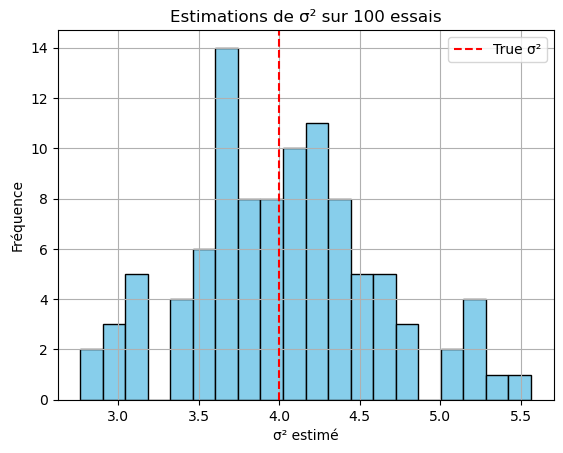

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Parameters
n = 100        # nb examples
d = 10         # dimension of input
sigma_true = 2.0  # std-deviation of noise

np.random.seed(42)

# Data (X, θ*, y)
X = np.random.randn(n, d)
theta_star = np.random.randn(d)
epsilon = np.random.normal(0, sigma_true, size=n)
y = X @ theta_star + epsilon

# Linear Regression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
theta_hat = model.coef_
y_pred = X @ theta_hat

# Estimation of sigma^2 by ||y - x(theta)||^2 / (n - d)
residuals = y - y_pred
numerator = np.sum(residuals ** 2)
sigma2_estimated = numerator / (n - d)

print(f"Vrai σ²         = {sigma_true ** 2:.4f}")
print(f"Estimé σ²       = {sigma2_estimated:.4f}")
print(f"Erreur relative = {abs(sigma2_estimated - sigma_true**2) / sigma_true**2 * 100:.2f}%")

n_trials = 100
estimates = []
for _ in range(n_trials):
    epsilon = np.random.normal(0, sigma_true, size=n)
    y = X @ theta_star + epsilon
    model.fit(X, y)
    y_pred = X @ model.coef_
    residuals = y - y_pred
    sigma2_estimated = np.sum(residuals ** 2) / (n - d)
    estimates.append(sigma2_estimated)

plt.hist(estimates, bins=20, color='skyblue', edgecolor='black')
plt.axvline(sigma_true**2, color='red', linestyle='--', label='True σ²')
plt.title(f'Estimations de σ² sur {n_trials} essais')
plt.xlabel('σ² estimé')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()